### 로지스틱 회귀분석

In [4]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time

In [5]:
# Personal Loan 데이터 불러오기
ploan = pd.read_csv("./data/Personal Loan.csv")
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
"""
Experience 경력
Income 수입
Family 가족단위
CCAvg 월 카드사용량
Education 교육수준 (1: undergrad, 2:Graduate, 3:Advance)
Mortgage 가계대출
Securities account 유가증권계좌 유무
CD account 양도예금증서계좌 유무
Online 온라인계좌 유무
CreditCard 신용카드 유무
"""

'\nExperience 경력\nIncome 수입\nFamily 가족단위\nCCAvg 월 카드사용량\nEducation 교육수준 (1: undergrad, 2:Graduate, 3:Advance)\nMortgage 가계대출\nSecurities account 유가증권계좌 유무\nCD account 양도예금증서계좌 유무\nOnline 온라인계좌 유무\nCreditCard 신용카드 유무\n'

In [7]:
# 의미없는 변수 제거 : ID, zip code 제거
ploan_processed = ploan.dropna().drop(['ID', 'ZIP Code'], axis=1, inplace=False)

# 상수항 추가
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')
ploan_processed.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


**설명변수(X), 타겟변수(Y) 분리 및 학습데이터와 평가데이터 분리**

In [8]:
# 대출여부: 1 or 0
feature_columns = ploan_processed.columns.difference(['Personal Loan'])

X = ploan_processed[feature_columns]
Y = ploan_processed['Personal Loan']

In [9]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, stratify=Y, train_size=0.7, test_size=0.3, random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


**로지스틱회귀모형 모델링 y=f(x)**

In [10]:
# 로지스틱 모형 적합
model = sm.Logit(train_y, train_x)
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131055
         Iterations 9


In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:                  0.6030
Time:                        23:14:06   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [12]:
# 회귀계수(coef) 출력과 의미해석
print(np.exp(results.params))
"""
- Age가 1단위 오를수록 대출확률이 1.024배 높다.
- Family가 1단위 많을수록 대출확률이 2.133배 높다.
- Income이 1단위 높을수록 대출확률이 1.056배 높다.
- Experience가 1단위 많을수록 대출확률이 0.992배 낮다. (p-value가 유의수준보다 높음)
- Mortgage가 1단위 높을수록 대출확률이 0.999배 낮다. (p-value가 유의수준보다 높음)

=> Experience, Mortgage는 대립가설을 기각하므로 변수선택 시 제외할 필요성이 있음.
"""

Age                   1.024773e+00
CCAvg                 1.103479e+00
CD Account            7.924761e+01
CreditCard            2.901239e-01
Education             4.573729e+00
Experience            9.929928e-01
Family                2.133814e+00
Income                1.056218e+00
Mortgage              9.998665e-01
Online                6.435563e-01
Securities Account    1.569221e-01
const                 9.005163e-07
dtype: float64


'\n- Age가 1단위 오를수록 대출확률이 1.024배 높다.\n- Family가 1단위 많을수록 대출확률이 2.133배 높다.\n- Income이 1단위 높을수록 대출확률이 1.056배 높다.\n- Experience가 1단위 많을수록 대출확률이 0.992배 낮다. (p-value가 유의수준보다 높음)\n- Mortgage가 1단위 높을수록 대출확률이 0.999배 낮다. (p-value가 유의수준보다 높음)\n\n=> Experience, Mortgage는 대립가설을 기각하므로 변수선택 시 제외할 필요성이 있음.\n'

In [13]:
# y_hat 예측
pred_y = results.predict(test_x)
pred_y # 확률 값을 나타내므로 임계값 기준으로 이진화 과정 필요함

1065    0.012968
487     0.023841
2157    0.001210
1765    0.196245
525     0.006610
          ...   
277     0.019982
914     0.959460
542     0.005239
32      0.011344
2360    0.084464
Length: 750, dtype: float64

In [14]:
def cut_off(y, threshold):
    Y = y.copy()
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return (Y.astype(int))

pred_Y = cut_off(pred_y, 0.5)
pred_Y

1065    0
487     0
2157    0
1765    0
525     0
       ..
277     0
914     1
542     0
32      0
2360    0
Length: 750, dtype: int32

In [15]:
# confusion matrix
cfmat = confusion_matrix(test_y, pred_Y)
print(cfmat)

[[661  12]
 [ 28  49]]


In [16]:
# confusion matrix accuracy 계산하기
def accuracy(cfmat):
    acc = (cfmat[0,0]+cfmat[1,1])/cfmat.sum()
    return acc
accuracy(cfmat)

0.9466666666666667

**임계값(cut-off)에 따른 성능지표 비교**

In [17]:
threshold = np.arange(0, 1, 0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y, i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = accuracy(cfmat)
table.index.name = 'threshold'
table.columns.name = 'performance'
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC:  0.9463923891858513


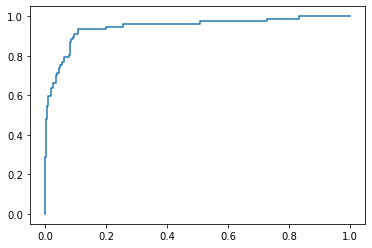

In [18]:
# ROC 커브 시각화
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)
plt.plot(fpr, tpr)

# AUC 면적 구하기
auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

### 비영향변수(Experience, Mortgage) 제거 후 회귀분석 수행  

In [19]:
# 대출여부: 1 or 0
feature_columns = ploan_processed.columns.difference(['Personal Loan', 'Experience', 'Mortgage'])

X = ploan_processed[feature_columns]
Y = ploan_processed['Personal Loan']

In [20]:
# 데이터 분할
train_x2, test_x2, train_y2, test_y2 = train_test_split(X, Y, stratify=Y, train_size=0.7, test_size=0.3, random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [21]:
# 로지스틱 모형 적합
model2 = sm.Logit(train_y2, train_x2)
results2 = model2.fit(method='newton')
results2.summary()
# Experience, Mortgage 변수가 제거된 후 다른 변수의 회귀계수값에 미치는 영향이 미미하므로,
# 제거된 변수는 공변량도 적고 출력변수에 미치는 영향도 적다고 볼수 있다.

Optimization terminated successfully.
         Current function value: 0.131062
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1740
Method:                           MLE   Df Model:                            9
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:                  0.6029
Time:                        23:14:11   Log-Likelihood:                -229.36
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                3.817e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0174      0.011      1.569      0.117      -0.004       0.039
CCAvg                  0.0997      0.062      1.596      0.111      -0.023       0.222
CD Account             4.3699      0.567      7.705      0.000       3.258       5.481
CreditCard            -1.2350      0.337     -3.668      0.000      -1.895      -0.575
Education              1.5249      0.187      8.156      0.000       1.158       1.891
Family                 0.7572      0.127      5.948      0.000       0.508       1.007
Income                 0.0546      0.004     12.833      0.000       0.046       0.063
Online                -0.4418      0.263     -1.678      0.093      -0.958       0.074
Securities Account    -1.8526      0.561     -3.302      0.001      -2.952      -0.753
const                -13.7465      1.164    -11.814      0.000     -16.027     -11.466
======================================================================================
"""

In [22]:
# 회귀계수(coef) 출력과 의미해석
print(np.exp(results2.params))

Age                    1.017523
CCAvg                  1.104827
CD Account            79.031918
CreditCard             0.290833
Education              4.594908
Family                 2.132311
Income                 1.056096
Online                 0.642863
Securities Account     0.156827
const                  0.000001
dtype: float64


In [23]:
# y_hat 예측
pred_y2 = results2.predict(test_x2)
pred_Y2 = cut_off(pred_y2, 0.5)
pred_Y2

1065    0
487     0
2157    0
1765    0
525     0
       ..
277     0
914     1
542     0
32      0
2360    0
Length: 750, dtype: int32

In [24]:
# confusion matrix
cfmat2 = confusion_matrix(test_y2, pred_Y2)
print(cfmat2)

[[660  13]
 [ 29  48]]


In [25]:
# confusion matrix accuracy 계산하기
def accuracy(cfmat):
    acc = (cfmat[0,0]+cfmat[1,1])/cfmat.sum()
    return acc
accuracy(cfmat2)
# 두개의 변수 제거에 정확도가 크게 변하지 않았으므로, 제거된 변수는 출력변수에 미치는 영향력이 없음을 증명할 수 있다.

0.944

In [26]:
# 임계값(cut-off)에 따른 성능지표 비교
threshold = np.arange(0, 1, 0.1)
table2 = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y2 = cut_off(pred_y2, i)
    cfmat2 = confusion_matrix(test_y2, pred_Y2)
    table2.loc[i] = accuracy(cfmat2)
table2.index.name = 'threshold'
table2.columns.name = 'performance'
table2

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.932000
0.4,0.936000
0.5,0.944000
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC:  0.9465467667547905


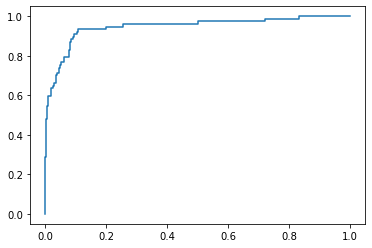

In [30]:
# ROC 커브 시각화
fpr, tpr, thresholds = metrics.roc_curve(test_y2, pred_y2, pos_label=1)
plt.plot(fpr, tpr)

# AUC 면적 구하기
auc = np.trapz(tpr, fpr)
print('AUC: ', auc)
# AUC 면적으로도 비교하여 보자면, 제거된 변수는 출력변수에 미치는 영향력이 없음을 증명할 수 있다.